In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import datetime

##Importação dos dados de demanda

In [ ]:
df = read_csv('Dados_JPS_12B1.csv',sep=';',decimal=',')
df.dropna(axis=1,inplace=True) # Eliminar os dados NaN
df.rename(columns={'JPS_12B1':'POTENCIA'},inplace=True) #Renomear a coluna dos dados de Potência
df.head(10)

DIA  MES   ANO  HORA  MINUTO  POTENCIA
0    1    1  2008     0       0       7.9
1    1    1  2008     0      15       7.7
2    1    1  2008     0      30       7.7
3    1    1  2008     0      45       7.4
4    1    1  2008     1       0       7.4
5    1    1  2008     1      15       7.4
6    1    1  2008     1      30       7.4
7    1    1  2008     1      45       7.2
8    1    1  2008     2       0       7.2
9    1    1  2008     2      15       7.3

In [ ]:
#Converter as colunas de tempo para o formato datetime
df['TEMPO'] = df[['DIA','MES','ANO','HORA','MINUTO']].apply(lambda x : datetime(year=x[2],month=x[1],day=x[0],hour=x[3],minute=x[4]), axis=1)
df['TEMPO']
df.drop(['DIA','MES','ANO','HORA','MINUTO'],axis=1,inplace=True)

df.set_index('TEMPO',inplace=True) #Configurar as datas como index

#Converter para float
df['POTENCIA'] = df['POTENCIA'].astype(float)
df

POTENCIA
TEMPO                        
2008-01-01 00:00:00       7.9
2008-01-01 00:15:00       7.7
2008-01-01 00:30:00       7.7
2008-01-01 00:45:00       7.4
2008-01-01 01:00:00       7.4
...                       ...
2013-12-31 22:45:00       9.6
2013-12-31 23:00:00       9.6
2013-12-31 23:15:00       9.3
2013-12-31 23:30:00       9.2
2013-12-31 23:45:00       9.2

[210432 rows x 1 columns]

In [ ]:
#maxima_semanal = df.groupby(pd.Grouper(freq='W')).max()
#maxima_diaria = df.groupby(pd.Grouper(freq='D')).max()

#Como as datas que são agrupadas são índices do DataFrame, utiliza-se o resample

maxima_semanal=df.resample('W').max()
maxima_diaria =df.resample('D').max()


In [ ]:
maxima_diaria

POTENCIA
TEMPO                
2008-01-01   9.000000
2008-01-02  13.200000
2008-01-03  13.900000
2008-01-04  13.000000
2008-01-05   9.800000
...               ...
2013-12-27  17.400000
2013-12-28  12.000000
2013-12-29  11.300000
2013-12-30  16.299999
2013-12-31  12.100000

[2192 rows x 1 columns]

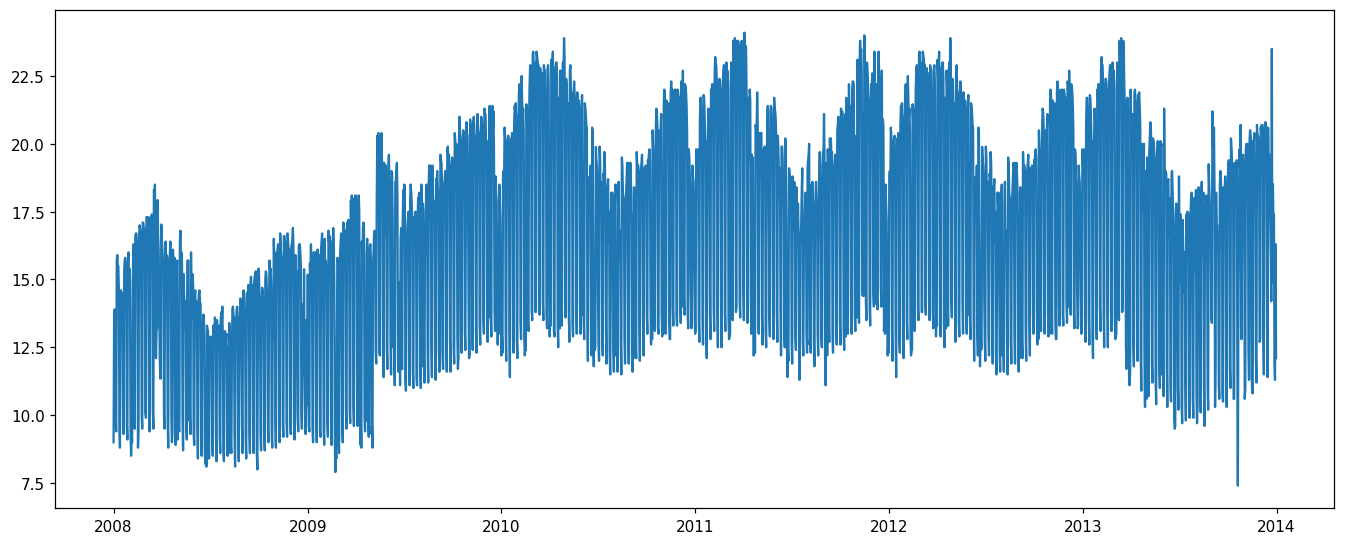

In [ ]:
plt.figure(figsize=(15,6),dpi=110)
plt.plot(maxima_diaria)
plt.show()

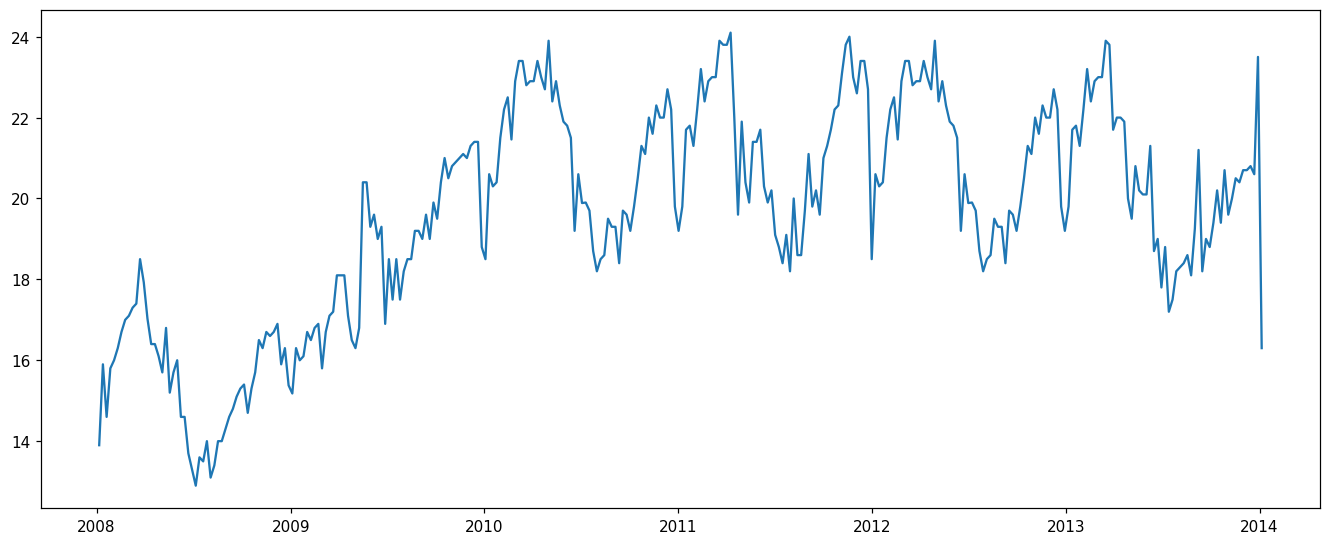

In [ ]:
plt.figure(figsize=(15,6),dpi=110)
plt.plot(maxima_semanal)
plt.show()

##Tratamento dos dados

POTENCIA
TEMPO                
2008-04-13  16.523719
2008-04-20  16.690386
2008-04-27  16.703719
2008-05-04  16.777053
2008-05-11  16.843719
...               ...
2013-12-08  19.870000
2013-12-15  19.973333
2013-12-22  19.933333
2013-12-29  20.286667
2014-01-05  20.106667

[300 rows x 1 columns]

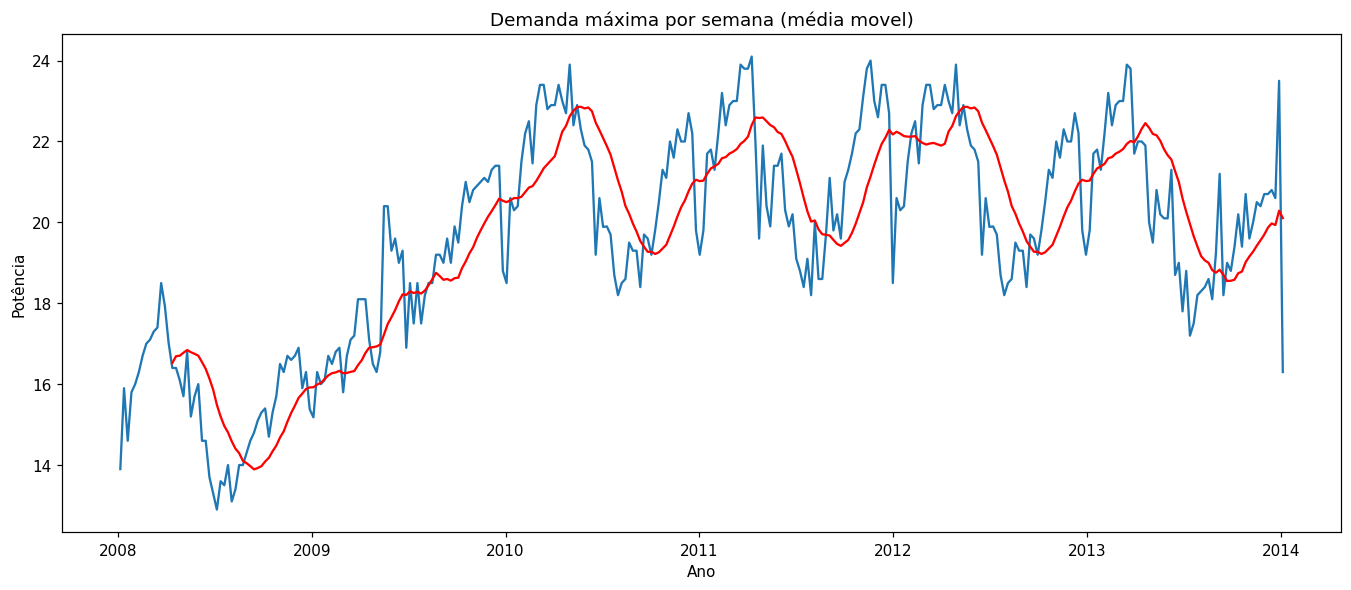

In [ ]:
#Média Móvel
maxima_semanal_mm = maxima_semanal['POTENCIA'].rolling(15).mean().dropna()

plt.figure(figsize=(15,6),dpi=110)
plt.plot(maxima_semanal)
plt.plot(maxima_semanal_mm,'r')
plt.title('Demanda máxima por semana (média movel)')
plt.ylabel('Potência')
plt.xlabel('Ano')

pd.DataFrame(maxima_semanal_mm)

POTENCIA
TEMPO                
2008-01-15  12.826667
2008-01-16  13.173333
2008-01-17  13.260000
2008-01-18  13.273333
2008-01-19  13.046667
...               ...
2013-12-27  17.441419
2013-12-28  16.888086
2013-12-29  16.761419
2013-12-30  17.088086
2013-12-31  16.521419

[2178 rows x 1 columns]

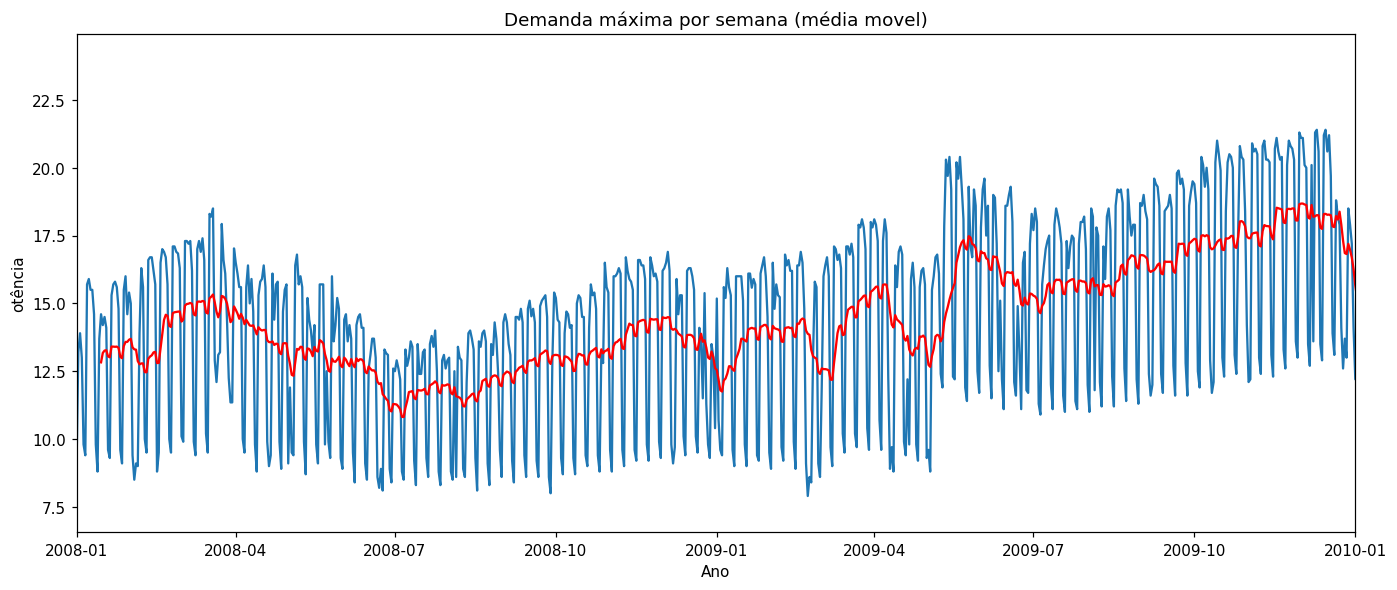

In [ ]:
maxima_diaria_mm = maxima_diaria['POTENCIA'].rolling(15).mean().dropna()

plt.figure(figsize=(15,6),dpi=110)
plt.plot(maxima_diaria)
plt.plot(maxima_diaria_mm,'r')
plt.title('Demanda máxima por semana (média movel)')
plt.ylabel('otência')
plt.xlabel('Ano')

plt.xlim([datetime(2008, 1, 1), datetime(2010, 1, 1)])


pd.DataFrame(maxima_diaria_mm)

##Formação do Banco de Dados

In [ ]:
def data_proc(data,n_data_tested,n_data_predict):

    # data -> entrada do conjunto de dados
    # n_data_tested -> número de amostras (histórico) utilizados para predição
    # n_data_predict -> número de amostras a serem preditas
    
    size_window = n_data_tested + n_data_predict

#new_data = np.concatenate(new_data)
    inputs = np.zeros([len(data)-size_window,n_data_tested])
    outputs = np.zeros([len(data)-size_window,n_data_predict])

    for i in range(len(data)-size_window):
        inputs[i] = data[i:(i+n_data_tested)] 
        outputs[i] = data[(i+n_data_tested):(i+size_window)]
        
    return[inputs, outputs]


In [ ]:
#data = maxima_semanal_mm
data = maxima_diaria_mm

n_data_tested = 4
n_data_predict = 3 #n_data_predict = (n+1) **O primeiro elemento corresponde ao elemento k**
size_window = n_data_tested + n_data_predict

#new_data = np.concatenate(new_data)
inputs = np.zeros([len(data)-size_window,n_data_tested])
outputs = np.zeros([len(data)-size_window,n_data_predict])

for i in range(len(data)-size_window):
    inputs[i] = data[i:(i+n_data_tested)] 
    outputs[i] = data[(i+n_data_tested):(i+size_window)]

In [ ]:
inputsDF = pd.DataFrame(inputs,columns = ['POTENCIA(k-4)','POTENCIA(k-3)','POTENCIA(k-2)','POTENCIA(k-1)'])
inputsDF

POTENCIA(k-4)  POTENCIA(k-3)  POTENCIA(k-2)  POTENCIA(k-1)
0         12.826667      13.173333      13.260000      13.273333
1         13.173333      13.260000      13.273333      13.046667
2         13.260000      13.273333      13.046667      13.013333
3         13.273333      13.046667      13.013333      13.406667
4         13.046667      13.013333      13.406667      13.406667
...             ...            ...            ...            ...
2166      17.853840      17.547174      17.633840      18.433840
2167      17.547174      17.633840      18.433840      18.047174
2168      17.633840      18.433840      18.047174      17.901419
2169      18.433840      18.047174      17.901419      17.661419
2170      18.047174      17.901419      17.661419      17.441419

[2171 rows x 4 columns]

In [ ]:
outputsDF = pd.DataFrame(outputs,columns = ['POTENCIA(k)','POTENCIA(k+1)','POTENCIA(k+2)'])
valores_preditos = outputsDF[['POTENCIA(k+1)','POTENCIA(k+2)']]
outputsDF
#valores_preditos

POTENCIA(k)  POTENCIA(k+1)  POTENCIA(k+2)
0       13.046667      13.013333      13.406667
1       13.013333      13.406667      13.406667
2       13.406667      13.406667      13.400000
3       13.406667      13.400000      13.406667
4       13.400000      13.406667      13.360000
...           ...            ...            ...
2166    18.047174      17.901419      17.661419
2167    17.901419      17.661419      17.441419
2168    17.661419      17.441419      16.888086
2169    17.441419      16.888086      16.761419
2170    16.888086      16.761419      17.088086

[2171 rows x 3 columns]

###Verificação dos dados

In [ ]:
BD = pd.concat([inputsDF, outputsDF],axis=1)
BD.head(20)
cols = BD.columns.tolist()
cols = ['POTENCIA(k)','POTENCIA(k-1)','POTENCIA(k-2)','POTENCIA(k-3)','POTENCIA(k-4)','POTENCIA(k+1)','POTENCIA(k+2)']
#cols[0] = cols[4]
#cols.pop(4)
BD = BD[cols]
BD.dropna(axis=0)
BD

POTENCIA(k)  POTENCIA(k-1)  ...  POTENCIA(k+1)  POTENCIA(k+2)
0       13.046667      13.273333  ...      13.013333      13.406667
1       13.013333      13.046667  ...      13.406667      13.406667
2       13.406667      13.013333  ...      13.406667      13.400000
3       13.406667      13.406667  ...      13.400000      13.406667
4       13.400000      13.406667  ...      13.406667      13.360000
...           ...            ...  ...            ...            ...
2166    18.047174      18.433840  ...      17.901419      17.661419
2167    17.901419      18.047174  ...      17.661419      17.441419
2168    17.661419      17.901419  ...      17.441419      16.888086
2169    17.441419      17.661419  ...      16.888086      16.761419
2170    16.888086      17.441419  ...      16.761419      17.088086

[2171 rows x 7 columns]

In [ ]:
BD = pd.concat([inputsDF, outputsDF],axis=1)
BD

POTENCIA(k-4)  POTENCIA(k-3)  ...  POTENCIA(k+1)  POTENCIA(k+2)
0         12.826667      13.173333  ...      13.013333      13.406667
1         13.173333      13.260000  ...      13.406667      13.406667
2         13.260000      13.273333  ...      13.406667      13.400000
3         13.273333      13.046667  ...      13.400000      13.406667
4         13.046667      13.013333  ...      13.406667      13.360000
...             ...            ...  ...            ...            ...
2166      17.853840      17.547174  ...      17.901419      17.661419
2167      17.547174      17.633840  ...      17.661419      17.441419
2168      17.633840      18.433840  ...      17.441419      16.888086
2169      18.433840      18.047174  ...      16.888086      16.761419
2170      18.047174      17.901419  ...      16.761419      17.088086

[2171 rows x 7 columns]

##Separação dos conjuntos de Treino e Teste

In [ ]:
#implementação da RNA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
#n_data_tested = 10
#n_data_predict = 2

#data_train = data[0:int(0.7*len(data))]
#data_test = data[:int(0.3*len(data))] #30% dos dados utilizados para teste
 
#[inputs_train, outputs_train] = data_proc(data_train,n_data_tested,n_data_predict)
#[inputs_test, outputs_test] = data_proc(data_test,n_data_tested,n_data_predict)

In [ ]:
data = np.array(BD)
data_norm = tf.keras.utils.normalize(data,axis=1)

input_train = data_norm[0:int(0.7*len(inputs)),0:5]
input_test = data_norm[int(0.7*len(inputs)):-1,0:5] 

output_train = data_norm[0:int(0.7*len(outputs)),5:7]
output_test = data_norm[int(0.7*len(outputs)):-1,5:7] 

In [ ]:
entrada_train = tf.convert_to_tensor(input_train)
saida_train = tf.convert_to_tensor(output_train)
entrada_test = tf.convert_to_tensor(input_test)
saida_test = tf.convert_to_tensor(output_test)

###Testes com o train_test_split da biblioteca sci-kit learn

In [ ]:
#X = np.array(inputsDF)
#y = np.array(outputsDF)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train = np.concatenate(X_train)
#y_train = np.concatenate(y_train)
#X_test = np.concatenate(X_test)
#y_test = np.concatenate(y_test)

In [ ]:
#df_teste = pd.DataFrame(X_test)
#plt.figure(figsize=(30,16),dpi=110)

#fig, ax = plt.subplots(1, 1,figsize=(15,6))
#data_aux=pd.DataFrame(maxima_semanal['POTENCIA'])
#data_aux.reset_index(inplace=True)
#data_aux.drop(['TEMPO'],axis=1,inplace=True)
#data_aux.plot(ax=ax)
#df_teste.plot(ax=ax)
#plt.show()
#df_teste
#data_aux

##Montagem da Rede Neural Artificial

In [ ]:

model = keras.Sequential([
    keras.Input(5),#shape=(entrada_train.shape[1],)),  # input layer (1)
    keras.layers.Dense(50, activation='sigmoid'),  # hidden layer (1)
    keras.layers.Dense(50, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(2, activation='sigmoid') # output layer 
])


opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt,
              loss='mse',
              metrics=['accuracy'])

model.summary()

model.fit(entrada_train, saida_train, shuffle=True, epochs=5000)

A saída de streaming foi truncada nas últimas 5000 linhas.
48/48 [==============================] - 0s 3ms/step - loss: 6.2527e-06 - accuracy: 0.7472
Epoch 2502/5000
48/48 [==============================] - 0s 3ms/step - loss: 7.2849e-06 - accuracy: 0.7452
Epoch 2503/5000
48/48 [==============================] - 0s 3ms/step - loss: 6.2789e-06 - accuracy: 0.7558
Epoch 2504/5000
48/48 [==============================] - 0s 3ms/step - loss: 6.4844e-06 - accuracy: 0.7433
Epoch 2505/5000
48/48 [==============================] - 0s 3ms/step - loss: 7.1379e-06 - accuracy: 0.7518
Epoch 2506/5000
48/48 [==============================] - 0s 3ms/step - loss: 6.8527e-06 - accuracy: 0.7459
Epoch 2507/5000
48/48 [==============================] - 0s 3ms/step - loss: 7.0570e-06 - accuracy: 0.7400
Epoch 2508/5000
48/48 [==============================] - 0s 3ms/step - loss: 7.2252e-06 - accuracy: 0.7294
Epoch 2509/5000
48/48 [==============================] - 0s 3ms/step - loss: 7.0540e-06 - accuracy: 0

##Avaliação dos Resultados

In [ ]:
test_loss, test_acc = model.evaluate(entrada_test, saida_test, verbose=1) 

print('Test accuracy:', test_acc)

21/21 [==============================] - 0s 1ms/step - loss: 6.6339e-06 - accuracy: 0.7189
Test accuracy: 0.7188940048217773


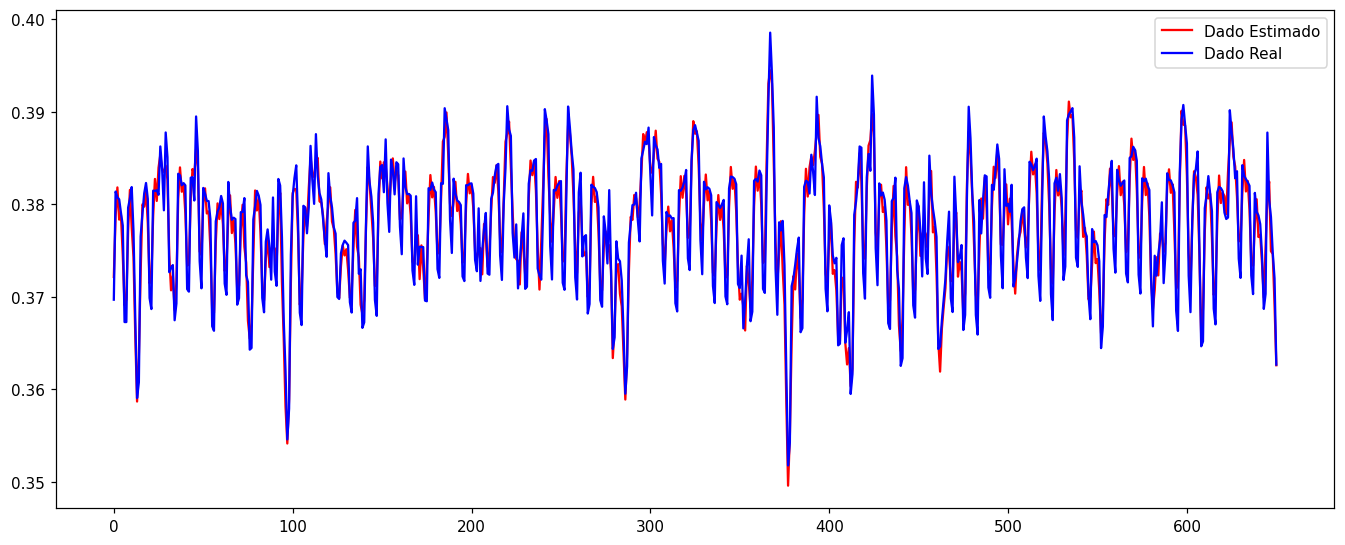

In [ ]:
predictions = model.predict(entrada_test)

plt.figure(figsize=(15,6),dpi=110)
plt.plot(predictions[:,0],'r')
plt.plot(saida_test[:,0],'b')
#plt.xlim([0,300])
plt.legend(['Dado Estimado','Dado Real'])
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


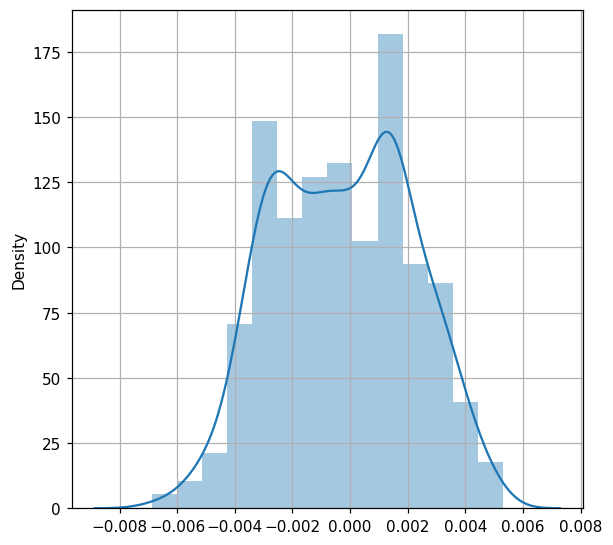

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,6),dpi=110)
plt.grid(True)
#plt.plot(predictions[:,0]-saida_test[:,0])
#plt.xlim([0,91])
sns.distplot(predictions[:,0]-saida_test[:,0])

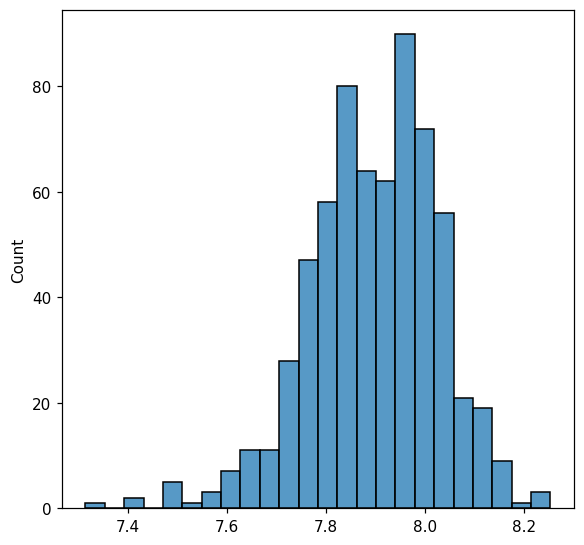

In [ ]:
plt.figure(figsize=(6,6),dpi=110)
sns.histplot(predictions[:,0]*BD['POTENCIA(k+1)'].max())